题目：寻找关键用户和分析社交关系
data.json 数据描述
1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：

节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [ ]:
import json
file_path = r"C:\Users\大头\Desktop\导论lab\repository-of-Owen\homework4\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
nodes = data.get("nodes",[])
edges = data.get("edges",[])
#初始化一个空的字典network，然后用来存储用户的直接朋友以及链接权重
network = {} 
for node in nodes:
    network[node[0]] = {}
for edge in edges:
    #可以理解为一个无向图，user1和user2分别互为对方的朋友
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight
friend_list = []
for user , friend in network.items():
    #获取每个用户的直接朋友
    friend_info = {
        "用户": user,
        "直接朋友" :  [{"名字": friend, "权重": weight} for friend, weight in friend.items()]
    }
    friend_list.append(friend_info)
print("\n每个用户的直接朋友列表:\n")
#我上网查了一下，发现这样的输出方式能看起来清楚一点
for entry in friend_list:
    print(f"用户: {entry['用户']}")
    for friend in entry['直接朋友']:
        print(f"  - 名字: {friend['名字']}, 权重: {friend['权重']}")
    print()  




每个用户的直接朋友列表:

用户: Yanyan-Wang
  - 名字: Aarebecca, 权重: 25.3
  - 名字: pomelo-nwu, 权重: 25.09
  - 名字: yangzy0603, 权重: 11.85
  - 名字: tyn1998, 权重: 9.62
  - 名字: yvonneyx, 权重: 7.39
  - 名字: lidongze0629, 权重: 7.25
  - 名字: RackweLLizm, 权重: 4.5
  - 名字: yikenie, 权重: 4.25
  - 名字: yubo0923, 权重: 3.61
  - 名字: Maple0817, 权重: 3.11
  - 名字: wj23027, 权重: 2.34
  - 名字: frank-zsy, 权重: 2.1
  - 名字: andyhuang18, 权重: 1.14
  - 名字: bifenglin, 权重: 0.86

用户: Aarebecca
  - 名字: Yanyan-Wang, 权重: 25.3
  - 名字: pomelo-nwu, 权重: 24.84
  - 名字: yangzy0603, 权重: 11.92
  - 名字: yvonneyx, 权重: 7.73
  - 名字: lidongze0629, 权重: 6.58
  - 名字: tyn1998, 权重: 6.4
  - 名字: RackweLLizm, 权重: 4.84
  - 名字: yikenie, 权重: 4.55
  - 名字: yubo0923, 权重: 3.82
  - 名字: Maple0817, 权重: 3.27
  - 名字: frank-zsy, 权重: 0.97

用户: pomelo-nwu
  - 名字: Yanyan-Wang, 权重: 25.09
  - 名字: Aarebecca, 权重: 24.84
  - 名字: yangzy0603, 权重: 13.85
  - 名字: tyn1998, 权重: 12.48
  - 名字: lidongze0629, 权重: 8.1
  - 名字: yvonneyx, 权重: 7.63
  - 名字: RackweLLizm, 权重: 4.97
  - 名字: yikenie, 权重: 4.66
  -

2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [20]:
import json
file_path = r"C:\Users\大头\Desktop\导论lab\repository-of-Owen\homework4\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
#提取node和edge的信息
nodes = data.get("nodes",[])
edges = data.get("edges",[])
network = {}
influence_scores = {}
#遍历node，提取用户名称和影响力分数
for node in nodes:
    user,score = node
    network[user] = {}
    influence_scores[user] = score
#遍历edge，提取边的起点和终点，并将边的权重加入到network中
for edge in edges:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight
#a:计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
#通过字典的推导去计算度数
#循环遍历建造的network中的每个用户，并且通过len()函数计算friends的长度，得到friends的度数
degree_counts = {user: len(friends) for user, friends in network.items()}  
#key=lambda x: x[1] 指定了排序的依据是每个元组的第二个元素（friend的数量）
top_5_degrees = sorted(degree_counts.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n度数最多的前五个用户以及其朋友数量")
for user, degree in top_5_degrees:
    print(f"用户：{user}, 朋友数量:{degree}")
    
#b:计算每个用户的影响力分数，并列出影响力分数最高的前5个用户及其影响力分数。
top_5_influence = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]
print("\n影响力分数最高的前五个用户")
for user, score in top_5_influence:
    print(f"用户：{user}, 影响力分数:{score}")

#c:综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。
influence_rank = {}
for user in network.keys():
    degree = degree_counts[user]
    influence_score = influence_scores[user]
    #影响力分数和朋友数量各占百分之50的权重，很难说二者谁更重要
    influence_rank[user] = 0.5 * degree + 0.5 * influence_score
top_influence_users = sorted(influence_rank.items(), key=lambda x: x[1], reverse=True)[:1]
print("\n对社交网络最有影响力的用户")
for user, rank in top_influence_users:
    print(f"用户：{user}, 得分：{rank}")



度数最多的前五个用户以及其朋友数量
用户：tyn1998, 朋友数量:30
用户：frank-zsy, 朋友数量:30
用户：pomelo-nwu, 朋友数量:24
用户：andyhuang18, 朋友数量:23
用户：wj23027, 朋友数量:23

影响力分数最高的前五个用户
用户：Yanyan-Wang, 影响力分数:50.95
用户：Aarebecca, 影响力分数:23.82
用户：pomelo-nwu, 影响力分数:22.36
用户：tyn1998, 影响力分数:16.64
用户：frank-zsy, 影响力分数:15.8

对社交网络最有影响力的用户
用户：Yanyan-Wang, 得分：32.475


3. 推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。
b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [24]:
import json
file_path = r"C:\Users\大头\Desktop\导论lab\repository-of-Owen\homework4\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)
nodes = data.get("nodes", [])
edges = data.get("edges", [])
network = {}
influence_scores = {}

for node in nodes:
    user, score = node
    network[user] = {}
    influence_scores[user] = score 

for edge in edges:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight 

key_user = "Yanyan-Wang"
#用集合去存储“朋友的朋友”，可以避免重复添加
maybe_friends = set()
for friend in network[key_user]:
    for friend_of_friend in network[friend]:
        if friend_of_friend != key_user and friend_of_friend not in network[key_user]:
            maybe_friends.add(friend_of_friend)
common_friends_count = {}
for maybe_friend in maybe_friends:
    common_count = sum(1 for friend in network[key_user] if friend in network[maybe_friend])
    common_friends_count[maybe_friend] = common_count
sorted_common_friends = sorted(common_friends_count.items(), key=lambda x: x[1], reverse=True)
print("\n给Yanyan-Wang推荐的朋友：")
for friend, common_count in sorted_common_friends:
    print(f"用户：{friend}，共同好友数量：{common_count}")
    
#b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。
connection_strength = {}
for friend in network[key_user]:
    for potential_friend, weight in network[friend].items():
        if potential_friend != key_user and potential_friend not in network[key_user]:
            if potential_friend not in connection_strength:
                connection_strength[potential_friend] = weight
            else:
                connection_strength[potential_friend] += weight

top_5_connections = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]

print("\n与 Yanyan-Wang 连接强度最高的5个用户:")
for user, strength in top_5_connections:
    print(f"用户: {user}, 连接强度: {strength}")


给Yanyan-Wang推荐的朋友：
用户：will-ww，共同好友数量：6
用户：zhicheng-ning，共同好友数量：6
用户：longyanz，共同好友数量：6
用户：lhbvvvvv，共同好友数量：6
用户：xiaoya-yaya，共同好友数量：6
用户：birdflyi，共同好友数量：6
用户：PureNatural，共同好友数量：6
用户：Zzzzzhuzhiwei，共同好友数量：6
用户：zhaosj975，共同好友数量：6
用户：xgdyp，共同好友数量：6
用户：stevending1st，共同好友数量：5
用户：pranavshuklaa，共同好友数量：4
用户：stealth-bombeer，共同好友数量：4
用户：wxharry，共同好友数量：4
用户：Vlad116，共同好友数量：4
用户：kunal8411，共同好友数量：4

与 Yanyan-Wang 连接强度最高的5个用户:
用户: will-ww, 连接强度: 47.81
用户: zhicheng-ning, 连接强度: 36.9
用户: Zzzzzhuzhiwei, 连接强度: 34.58
用户: PureNatural, 连接强度: 30.759999999999998
用户: lhbvvvvv, 连接强度: 29.900000000000002


4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

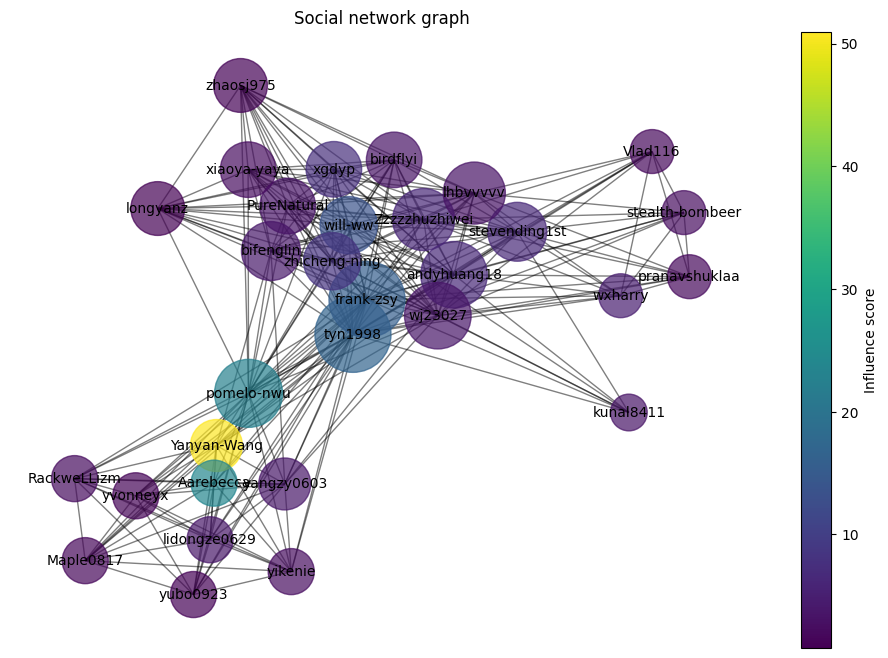

In [70]:
import json
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
random.seed(66)  
np.random.seed(66)
file_path = r"C:\Users\大头\Desktop\导论lab\repository-of-Owen\homework4\hw4_data.json"
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

nodes = data.get("nodes", [])
edges = data.get("edges", [])

network = {}
influence_scores = {}

for node in nodes:
    user, score = node
    network[user] = {}
    influence_scores[user] = score  # 存储影响力分数

for edge in edges:
    user1, user2, weight = edge
    network[user1][user2] = weight
    network[user2][user1] = weight  
G = nx.Graph()

for user in network.keys():
    G.add_node(user, influence=influence_scores[user])  

for user1, friends in network.items():
    for user2, weight in friends.items():
        G.add_edge(user1, user2, weight=weight)

# 根据朋友数量设置节点大小
node_sizes = [len(network[user]) * 100 for user in G.nodes()]  
# 根据影响力分数设置节点颜色
node_colors = [G.nodes[user]['influence'] for user in G.nodes()]  

plt.figure(figsize=(12, 8))
 # 使用 spring 布局的视觉效果比较自然，减少重叠
pos = nx.spring_layout(G) 
# 绘制节点和边
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.7)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)

# 创建颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])

cbar = plt.colorbar(sm, ax=plt.gca(), label='Influence score')

plt.title('Social network graph')
plt.axis('off')  
plt.show()
